# 회귀(Regression)

## 지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

#### 회귀는 연속형 값 을 예측 하는것. 
##### ---> 예측해야하는 범위가 무한대(넓다.)//예를들면 0-1사이의 모든 숫자들이 범위가 된다 ---> 정확도를 평가지표로 보지않음 
  -- 오차가 적은게 좋은것 

#### 분류(Classifier)는 나눠서 그값을 예측 (범주형값을)  -->예측해야하는 값이 정해져 있다~!--> 몇개를 맞췄는지 정확도가 중요한지표



## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다
-- 오차가 적은게 좋은은 모델 이니까(정확한 값을 맞출수 없으니까)
-- MAE도 있지만 잘 안쓴다
- ### MSE (Mean Squared Error)
    - 오차 제곱의 평균
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것( 음수가 나오는것을 방지)
    - mean_squared_error() : 호출할때 
    - 평가지표 입력할때(문자열로 입력할때) : **scoring = 'neg_mean_squared_error'** //// neg = negative
     - GridSearch를 쓸때 :neg 가붙은이유 : 오차는 작을 수록 좋기 때문에 원래 MSE에 마이너스 (-) 를 붙여서 오차가 제일 큰것을 제일 작은수로 만들어서       랭킹순위 제일 밑으로 가게하고 오차가 제일 적은것을 가장 큰값으로 만들어서 랭킹을 높이기 위해이다.
    - 스코어(큰수, 여기선 오차// 근데 오차가 큰숫자이면 안좋은 모델이니까)가 높은 랭크로 올라가가니까 -를 붙여서 오차가 가장큰값을 가장 작은 값으로         만들어서 랭크를 보는것
    
    - 원래 오찰보려면 다시 -1 을 곱해줘야함 
    score 는 그냥 큰숫자를 상위랭크로 보여주니까 
    
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    
- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)

    - 평균(대표값)으로 y를 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 예측한 haty가 y 와같아지면 1이되니까 그리고 값을 똑같이 맞춘거니까 성능 좋다// 평균과 똑같이 예측하면 결과가 0 이니까 평균과 같은성능인 모델인       게 되니까 안좋은 모델이 된다.
    - 모델예측오차/평균예측오차 를 나눠서 
    - 1에 가까울 수록 좋은 모델.
    - r2_score() : 호출할때
    - 'r2'  :문자열로 입력할때
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    



# Guide
- 결정계수. 바이오에선 90%, 공학에선 70%, 사회과학에선 13% 정도가 기준이 된다고 한다. 기준으로 모델의 성능 평가

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression # 데이터셋을 만든다. 설정한 값에 맞춰서 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # 선형회기모델 

### make_regression 의 하이퍼 파라미터 
#### n_features : X의 feature(컬럼)수 , y는 당연히 하나(y는 타겟이니까)
#### n_informative : target을 만드는데 영향을 주는 feature 의 개수 

- 만약 n_features = 10 으로 주고 n_informative =5 로 주면 10개의 컬럼중 target을 만들때 5개의 컬럼만 영향을 주는 것이다.
#### coef  :  coefficient 상관계수

In [4]:
X, y = make_regression(n_samples=100, # 샘플(행)수
                       n_features=1, # feature(컬럼)수 // X 의 컬럼수 , y는 당연히 하나고.
                       n_informative=1, # target(y값) 을 만드는데 영향을 주는 feature의 개수.  feature에 영향을 주는 컬럼수
                       noise = 50,   # 잡음(오차를 만들어주는) // 
                       coef = False, #Feature간 상관성 여부  // 상관성이 너무 많으면 y 값을 예측하는데 방해가됨. 컬럼의값이 비슷한 내용의 값들이 들어가서
                       random_state = 1)

In [5]:
X.shape, y.shape

((100, 1), (100,))

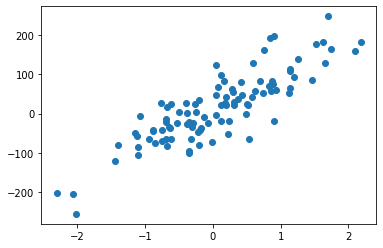

In [8]:
plt.scatter(X, y)  #noise = 50

In [9]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(15.293427290684107,
 -255.11169199137663,
 247.19463389209255,
 20.62597485010551)

In [10]:
# X가 얼마일때 y값을 찾는데 오차가 가장적은 선을 긋는 선형회귀

#### 데이터의 패턴에 맞는 가장 적함판 방정식(직선)을 찾는다.

In [11]:
lr = LinearRegression()
lr.fit(X, y)   # 데이터의 패턴에 맞는 가장 적함판 방정식(직선)을 찾는다.

LinearRegression()

In [16]:
# 예측
pred = lr.predict(X)  # 찾은 직선(방정식)으로 값을 예측한다.
# np.mean(pred)
pred.size, X

100

In [20]:
np.square(y.mean()), y.mean()

(233.88891829544144, 15.293427290684107)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 평가
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print("MSE : ", mse)
print("RMSE : ", np.sqrt(mse))
print("MAE:", mean_absolute_error(y,pred))  # 오차의 절대값으로
print('R^2 : ', r2)


MSE :  2078.5472792307764
RMSE :  45.59108771712709
MAE: 34.84147804463735
R^2 :  0.7321024057172182


In [21]:
score = cross_val_score(lr, X, y, cv=5)#, scoring='r2') #R2 # scoring 생략 : 분류 - accuracy, 회귀 -r2 기본방식
score, np.mean(score)  # 68 퍼센트 정도로 y 값을 맞출 수 있다.

(array([0.58124097, 0.82853824, 0.52826294, 0.76611492, 0.7184243 ]),
 0.6845162761863837)

In [24]:
# mse 
score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=10)# * -1 
np.mean(score)*-1
#스코어가(오차) 작을 수록 좋은 것인데 양수로 하면 작은게 밑이고 큰게 위이니까 음수로 해서 나오게 함 GridSearch 에서의 rank를 맞춰주기 위해서 

2207.379873655927

In [25]:
score*-1 # 이게 원래 값임

array([1882.70290581, 2859.09589717,  420.87862081, 3244.99975507,
       1404.5936989 , 2794.10631553, 1863.97405357, 1262.61248332,
       3714.70549983, 2626.12950655])

In [27]:
lr.fit(X, y)
lr.coef_, lr.intercept_   #lr.coef_ ==> W(가중치)  // lr.intercept_  ==>b //// y = 85.1x +10.135

(array([85.14546889]), 10.135071944054275)

In [28]:
X.shape, y.shape

((100, 1), (100,))

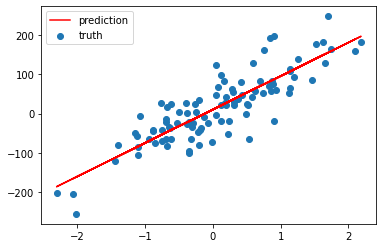

In [30]:
plt.scatter(X, y, label ='truth')
y_hat = X*lr.coef_ + lr.intercept_  # 이런 방정식을 갖고 y 값을 예측을 함
plt.plot(X, y_hat, color='red', label ='prediction')  # y_hat : 예측값  , 빨간선.
plt.legend()
plt.show()

In [ ]:
# 선형회귀는 y 값에 오차가 가장 작은 값들을 예측해서 선을 긋는것이다.

In [32]:
lr.predict([[0],[1]])  # X가 0일때 ,
1일때 값

array([10.13507194, 95.28054083])

## 기존 분류 모델의 회귀 모델

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 
# stratify =y --> 분류에선 y값이 범주형이라 비율을 나눌수 잇지만 이게 중요하지만 
#- 회귀에서는 y 값이다다른 값이기때문에 이렇게 할 수가 없고 ,, 거의 분류에서만 사용한다.

In [36]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
tree_reg = DecisionTreeRegressor(max_depth=5)
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=2)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('tree',tree_reg), ('random forest',rf_reg), ('linear reg',lr_reg)]

In [37]:
def print_metrics(y, y_pred, title=None):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse}, R2:{r2}")

In [38]:
for name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # 위에 함수 호출
    print_metrics(y_train, pred_train, name+" - Train")
    print_metrics(y_test, pred_test, name+" - Test")
    print("-------------------------------------------")

knn - Train
MSE:1427.767659021123, RMSE:37.785812933178015, R2:0.8019417941941395
knn - Test
MSE:2864.855454376287, RMSE:53.52434450207015, R2:0.6640766473771966
-------------------------------------------
tree - Train
MSE:817.4625116301221, RMSE:28.59130132802846, R2:0.8866025873719422
tree - Test
MSE:3301.0727964279786, RMSE:57.45496320099751, R2:0.6129272632816158
-------------------------------------------
random forest - Train
MSE:1714.9404173063826, RMSE:41.41183909592017, R2:0.7621055358905346
random forest - Test
MSE:3004.453663302524, RMSE:54.81289687019401, R2:0.6477078290862055
-------------------------------------------
linear reg - Train
MSE:2017.1792010802012, RMSE:44.9130181693482, R2:0.7201793367215267
linear reg - Test
MSE:2368.5811126977082, RMSE:48.6680707723011, R2:0.7222681140435795
-------------------------------------------


In [40]:
# VotingRegressor: 각 모델이 예측한 값의 평균을 반환한다.
knn_reg = KNeighborsRegressor(n_neighbors=3)  # X 값에 선을 긋고 가장가까운 y 값들의 평균을 낸다.
tree_reg = DecisionTreeRegressor(max_depth=2)  # mse 값이 가장 작아지는 기준으로 질문을 한다.
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=2)
lr_reg = LinearRegression()

estimators = [("knn",knn_reg), ('random forest',rf_reg), ('linear reg',lr_reg)]

vote_reg = VotingRegressor(estimators)
vote_reg.fit(X_train, y_train)
pred_train = vote_reg.predict(X_train)  #각모델이 예측한 값의 평균값이 최종값이다.
pred_test = vote_reg.predict(X_test)

In [41]:
print_metrics(y_train, pred_train)  
print_metrics(y_test, pred_test)

MSE:1569.820730385567, RMSE:39.620963269279144, R2:0.7822363636460468
MSE:2441.1538392057955, RMSE:49.40803415645876, R2:0.7137584792693943


In [43]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [44]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

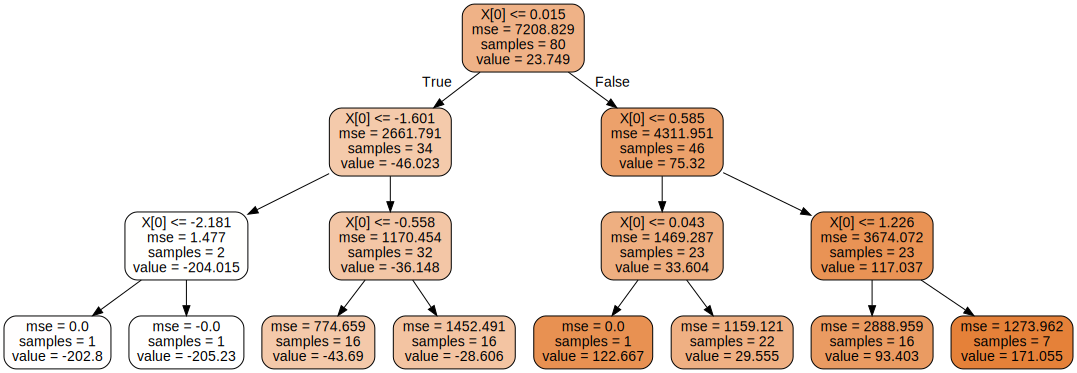

In [46]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(tree_reg, 
                               out_file=None,
                               rounded=True, filled=True))
# display(SVG(graph.pipe(format='svg'))) --> 예전에 햇던방식
graph  # mse 가 0이될때까지 질문함 , value => y값들의 평균// 출력해주는 예측값임

In [47]:
X_train.shape

(80, 1)

In [48]:
X_train<=0.015

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
np.where(X_train<=0.015)[0] #true였던 인덱스 

In [25]:
#위 그림에서 value 는 sample값들의 평균


np.mean(y_train[np.where(X_train<=0.015)[0]])

-46.0226932531074

In [26]:
y_train.shape

(80,)